In [1]:
%reset -f

In [2]:
import redis
import json
from datetime import date
from datetime import timedelta

r = redis.Redis(host='localhost', port=6379, db=0)

dataCompany = json.loads(r.get('dataCompany')) 
cost_kWh_generation = float(dataCompany['priceSolarPanelGenerate'])

solarPanelGeneration = json.loads(r.get('solarPanelGeneration')) 
acum_kWh_generation = float(solarPanelGeneration['kWh_acumGeneration'])

prevDay = (date.today() - timedelta(days = 1)).strftime('%d/%m/%y')

#Generation history
data_setGenerationHistory = {"date":prevDay,"kWh":round(acum_kWh_generation,6),"benefit":round((acum_kWh_generation*cost_kWh_generation),3)}

json_dumpGenerationHistory = json.dumps(data_setGenerationHistory)
r.lpush('generationHistoryList',json_dumpGenerationHistory) 


182

In [3]:
import redis
import json
from datetime import date
from datetime import timedelta

r = redis.Redis(host='localhost', port=6379, db=0)

dataCompany = json.loads(r.get('dataCompany')) 
cost_kWh_consumption = float(dataCompany['pricekWh'])

energyConsumption = json.loads(r.get('energyConsumption')) 
acum_kWh_consumption = float(energyConsumption['kWh_acum'])

given_date = (date.today() - timedelta(days = 1))
#given_date = date(2019, 6, 23)
first_day_of_month = given_date.replace(day=1).strftime('%d/%m/%y')
 
#print("\nFirst day of month: ", first_day_of_month, "\n")

#Consumption history

#Buscamos si en la tabla hash esta la key del primer dia este mes.

returnRedis = r.hget('consumptionHistoryHashList', first_day_of_month)
#print(returnRedis)

if returnRedis!=None:
    #Se ha encontrado la key, por lo tanto actualizamos los kWh acum del mes.
    tempJson = json.loads(returnRedis)
    tempJson['kWh']+=round(acum_kWh_consumption,6)
    tempJson['cost']=round((tempJson['kWh']*cost_kWh_consumption),3)
    
    json_dumpConsumptionHistoryUPD = json.dumps(tempJson)
    r.hset('consumptionHistoryHashList',first_day_of_month,json_dumpConsumptionHistoryUPD)
    
else:
    #No se ha encontrado la key, por lo tanto creamos una nueva.
    print("No hay nada!")
    
    # Guaranteed to get the next month. Force any_date to 28th and then add 4 days.
    next_month = (date.today() - timedelta(days = 1)).replace(day=28) + timedelta(days=4)
    #next_month = date(2019, 6, 23).replace(day=28) + timedelta(days=4)
    # Subtract all days that are over since the start of the month.
    last_day_of_month = (next_month - timedelta(days=next_month.day)).strftime('%d/%m/%y')
    
    data_setConsumptionHistory = {"endPeriod":last_day_of_month,"kWh":round(acum_kWh_consumption,6),"cost":round((acum_kWh_consumption*cost_kWh_consumption),3)}
    json_dumpConsumptionHistory = json.dumps(data_setConsumptionHistory)
    r.hset('consumptionHistoryHashList',first_day_of_month,json_dumpConsumptionHistory)


In [4]:
pathDataCSV = 'data/REDD/low_freq2'
pathDataH5 = 'data/data.h5'

In [5]:
import redis
import json
r = redis.Redis(host='localhost', port=6379, db=0)

appliances = json.loads(r.get('dataAppliances')) 

selectedAppliances = []

if appliances['Refrigerator']==True:
    selectedAppliances.append('fridge')
if appliances['Dryer']==True:
    selectedAppliances.append('washer dryer')
if appliances['Microwave']==True:
    selectedAppliances.append('microwave')
if appliances['Dishwasher']==True:
    selectedAppliances.append('dish washer')
if appliances['Oven']==True:
    selectedAppliances.append('electric oven')
if appliances['Electric Hob']==True:
    selectedAppliances.append('electric stove')
if appliances['Electric heater']==True:
    selectedAppliances.append('electric space heater')
    
print(selectedAppliances)

['fridge', 'electric space heater']


In [6]:
import csv
import datetime

epoch = datetime.datetime.utcfromtimestamp(0)
dt = datetime.datetime.today().replace(hour=0, minute=0, second=0, microsecond=0) - datetime.timedelta(days=1)
print(dt)
epochTimeS=(dt - epoch).total_seconds()
epochTime=int(epochTimeS)
print(epochTime)



        
#CH3        
countChannelDataEpoch=0
epochTime=int(epochTimeS)
listCH3_modelWS=[]
with open('models/channel_3.dat', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if(countChannelDataEpoch<86400):
            if 'electric oven' in selectedAppliances:
                valModelWs=row[0].split(' ')[1]
            else:
                valModelWs=0
            #print(epochTime)
            #print(valModelWs)
            listCH3_modelWS.append([epochTime,valModelWs])
            epochTime+=1
            countChannelDataEpoch+=1
        else:
            break
                
with open(pathDataCSV+'/house_1/channel_3.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in listCH3_modelWS:
        writer.writerow([i[0], i[1]])

        
#CH4        
countChannelDataEpoch=0
epochTime=int(epochTimeS)
listCH4_modelWS=[]
with open('models/channel_4.dat', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if(countChannelDataEpoch<86400): 
            if 'fridge' in selectedAppliances:
                valModelWs=row[0].split(' ')[1]
            else:
                valModelWs=0
            #print(epochTime)
            #print(valModelWs)
            listCH4_modelWS.append([epochTime,valModelWs])
            epochTime+=1
            countChannelDataEpoch+=1
        else:
            break
                
with open(pathDataCSV+'/house_1/channel_4.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in listCH4_modelWS:
        writer.writerow([i[0], i[1]])

        
#CH5        
countChannelDataEpoch=0
epochTime=int(epochTimeS)
listCH5_modelWS=[]
with open('models/channel_5.dat', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if(countChannelDataEpoch<86400):
            if 'dish washer' in selectedAppliances:
                valModelWs=row[0].split(' ')[1]
            else:
                valModelWs=0
            #print(epochTime)
            #print(valModelWs)
            listCH5_modelWS.append([epochTime,valModelWs])
            epochTime+=1
            countChannelDataEpoch+=1
        else:
            break
                
with open(pathDataCSV+'/house_1/channel_5.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in listCH5_modelWS:
        writer.writerow([i[0], i[1]])
        
        
#CH6        
countChannelDataEpoch=0
epochTime=int(epochTimeS)
listCH6_modelWS=[]
with open('models/channel_6.dat', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if(countChannelDataEpoch<86400):
            if 'washer dryer' in selectedAppliances:
                valModelWs=row[0].split(' ')[1]
            else:
                valModelWs=0
            #print(epochTime)
            #print(valModelWs)
            listCH6_modelWS.append([epochTime,valModelWs])
            epochTime+=1
            countChannelDataEpoch+=1
        else:
            break
                
with open(pathDataCSV+'/house_1/channel_6.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in listCH6_modelWS:
        writer.writerow([i[0], i[1]])
        
        
#CH7        
countChannelDataEpoch=0
epochTime=int(epochTimeS)
listCH7_modelWS=[]
with open('models/channel_7.dat', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if(countChannelDataEpoch<86400):
            if 'microwave' in selectedAppliances:
                valModelWs=row[0].split(' ')[1]
            else:
                valModelWs=0
            #print(epochTime)
            #print(valModelWs)
            listCH7_modelWS.append([epochTime,valModelWs])
            epochTime+=1
            countChannelDataEpoch+=1
        else:
            break
                
with open(pathDataCSV+'/house_1/channel_7.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in listCH7_modelWS:
        writer.writerow([i[0], i[1]])
    
    
#CH8        
countChannelDataEpoch=0
epochTime=int(epochTimeS)
listCH8_modelWS=[]
with open('models/channel_8.dat', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if(countChannelDataEpoch<86400):
            if 'electric space heater' in selectedAppliances:
                valModelWs=row[0].split(' ')[1]
            else:
                valModelWs=0
            #print(epochTime)
            #print(valModelWs)
            listCH8_modelWS.append([epochTime,valModelWs])
            epochTime+=1
            countChannelDataEpoch+=1
        else:
            break
                
with open(pathDataCSV+'/house_1/channel_8.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in listCH8_modelWS:
        writer.writerow([i[0], i[1]])
        
        
#CH9        
countChannelDataEpoch=0
epochTime=int(epochTimeS)
listCH9_modelWS=[]
with open('models/channel_9.dat', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if(countChannelDataEpoch<86400):
            if 'electric stove' in selectedAppliances:
                valModelWs=row[0].split(' ')[1]
            else:
                valModelWs=0
            #print(epochTime)
            #print(valModelWs)
            listCH9_modelWS.append([epochTime,valModelWs])
            epochTime+=1
            countChannelDataEpoch+=1
        else:
            break
                
with open(pathDataCSV+'/house_1/channel_9.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in listCH9_modelWS:
        writer.writerow([i[0], i[1]])

2022-01-04 00:00:00
1641254400


In [7]:
#Solo para test
#CH1
epoch = datetime.datetime.utcfromtimestamp(0)
dt = datetime.datetime.today().replace(hour=0, minute=0, second=0, microsecond=0) - datetime.timedelta(days=1)
epochTimeS=(dt - epoch).total_seconds()

countChannelDataEpoch=0
epochTime=int(epochTimeS)
listCH1_modelWS=[]
with open('models/backupCh1OKoriginal.dat', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if(countChannelDataEpoch<86400):
            valModelWs=row[0].split(' ')[1]
            #print(epochTime)
            #print(valModelWs)
            listCH1_modelWS.append([epochTime,valModelWs])
            epochTime+=1
            countChannelDataEpoch+=1
        else:
            break
                
with open(pathDataCSV+'/house_1/channel_1.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in listCH1_modelWS:
        writer.writerow([i[0], i[1]])

In [8]:
import redis
import json
r = redis.Redis(host='localhost', port=6379, db=0)

appliances = json.loads(r.get('dataAppliances')) 

selectedAppliances = []

if appliances['Refrigerator']==True:
    selectedAppliances.append('fridge')
if appliances['Dryer']==True:
    selectedAppliances.append('washer dryer')
if appliances['Microwave']==True:
    selectedAppliances.append('microwave')
if appliances['Dishwasher']==True:
    selectedAppliances.append('dish washer')
if appliances['Oven']==True:
    selectedAppliances.append('electric oven')
if appliances['Electric Hob']==True:
    selectedAppliances.append('electric stove')
if appliances['Electric heater']==True:
    selectedAppliances.append('electric space heater')
    
print(selectedAppliances)

['fridge', 'electric space heater']


In [9]:
import csv
rtList = r.lrange("rtList", 0, 86400);

rtList.reverse()


with open(pathDataCSV+'/house_1/channel_1.dat', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=' ')
    for i in rtList:
        data = json.loads(i)
        writer.writerow([data['epochTime'], round(data['kW']*1000,2)])

In [10]:
#from nilmtk.dataset_converters import convert_redd
from nilmtk.dataset_converters import convert_reddAlex
convert_reddAlex(pathDataCSV, pathDataH5)
#convert_redd('data/REDD/dades', 'data/dades.h5')

Loading house 1... 1 3 4 5 6 7 8 9 
Loaded metadata
Done converting YAML metadata to HDF5!
Done converting REDD to HDF5!


In [11]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils

%matplotlib inline

In [12]:
rcParams['figure.figsize'] = (13, 6)

In [13]:
train = DataSet(pathDataH5)
test = DataSet(pathDataH5)

#print(test.buildings[1].elec.mains().load(physical_quantity = 'power', ac_type = 'apparent', sample_period=1))

In [14]:
building = 1

In [15]:
from datetime import date
from datetime import timedelta

day = (date.today() - timedelta(days = 1)).strftime('%Y-%m-%d')

print("Date to predict appliances consuption "+day)

#train => Model
#test => Data meter

train.set_window(end=day)
test.set_window(start=day)

#train.set_window(end="2021-10-20")
#test.set_window(start="2021-10-20")

#train.set_window(end="2011-05-01")
#test.set_window(start="2011-05-01")

train_elec = train.buildings[1].elec
test_elec = test.buildings[1].elec

Date to predict appliances consuption 2022-01-04


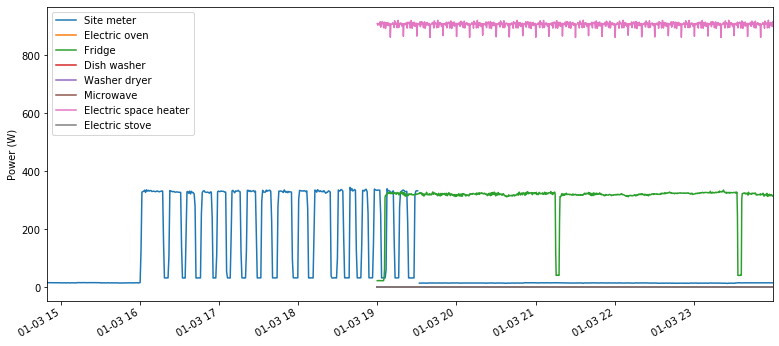

In [16]:
train_elec.plot()

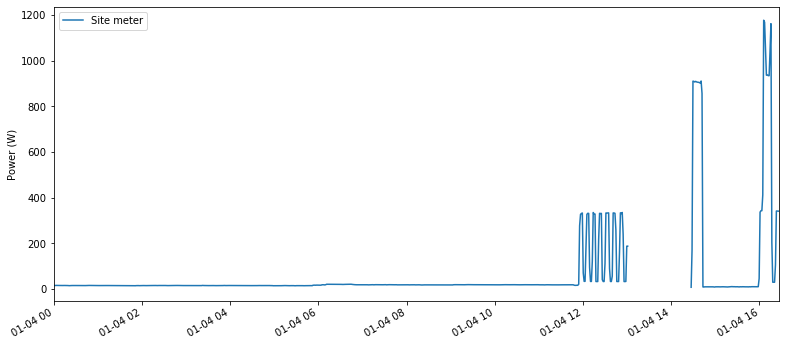

In [17]:
test_elec.mains().plot()

In [18]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}

    # "ac_type" varies according to the dataset used. 
    # Make sure to use the correct ac_type before using the default parameters in this code.    
    for i, chunk in enumerate(test_elec.mains().load(physical_quantity = 'power', ac_type = 'apparent', sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.loc[common_index_local]
    pred_overall = pred_overall.loc[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    return gt_overall, pred_overall

In [19]:
#top_5_train_elec = train_elec.submeters().select_top_k(k=2)
top_5_train_elec = train_elec.submeters().select_using_appliances(type=selectedAppliances)

classifiers = {'CO':CombinatorialOptimisation(), 'FHMM':FHMM()}
predictions = {}
sample_period = 3 #Cambiar el sample_period a 1, cuando este en produccion
for clf_name, clf in classifiers.items():
    print("*"*20)
    print(clf_name)
    print("*" *20)
    start = time.time()
    # Note that we have given the sample period to downsample the data to 1 minute. 
    # If instead of top_5 we wanted to train on all appliance, we would write 
    # fhmm.train(train_elec, sample_period=60)
    clf.train(top_5_train_elec, sample_period=sample_period)
    end = time.time()
    print("Runtime =", end-start, "seconds.")
    gt, predictions[clf_name] = predict(clf, test_elec, sample_period, train.metadata['timezone'])

********************
CO
********************
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])'
Done training!
Runtime = 0.804370641708374 seconds.
Estimating power demand for 'ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Estimating power demand for 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])'
********************
FHMM
********************
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])' with 3 stat

In [20]:
appliance_labels = [m.label() for m in gt.columns.values]

In [21]:
gt.columns = appliance_labels
predictions['CO'].columns = appliance_labels
predictions['FHMM'].columns = appliance_labels
#Create DataFrame
df = pd.DataFrame({predictions['CO'].head(25).to_string()})

#Convert the Columns to string
df[df.columns]=df[df.columns].astype(str)

#Create the list of column separator width 
SepWidth = [5,6,3,8]

#Temp dict
tempdf = {}
#Convert all the column to series
for i, eCol in enumerate(df):
    tempdf[i] = pd.Series(df[eCol]).str.pad(width=SepWidth[i])

#Final DataFrame
Fdf = pd.concat(tempdf, axis=1)
#print Fdf
#Export to csv
Fdf.to_csv("./testCO.txt", sep='\t', index=False, header=False, encoding='utf-8')




In [22]:
predictions['CO'].head(17480)

Fridge  Electric space heater
2022-01-04 00:00:00-05:00     0.0                    0.0
2022-01-04 00:00:03-05:00     0.0                    0.0
2022-01-04 00:00:06-05:00     0.0                    0.0
2022-01-04 00:00:09-05:00     0.0                    0.0
2022-01-04 00:00:12-05:00     0.0                    0.0
...                           ...                    ...
2022-01-04 16:01:45-05:00   322.0                    0.0
2022-01-04 16:01:48-05:00   322.0                    0.0
2022-01-04 16:01:51-05:00   322.0                    0.0
2022-01-04 16:01:54-05:00   322.0                    0.0
2022-01-04 16:01:57-05:00   322.0                    0.0

[17480 rows x 2 columns]

In [23]:
predictions['FHMM'].head(25)

Fridge  Electric space heater
2022-01-04 00:00:00-05:00    33.0                  898.0
2022-01-04 00:00:03-05:00    33.0                  597.0
2022-01-04 00:00:06-05:00    33.0                  898.0
2022-01-04 00:00:09-05:00    33.0                  597.0
2022-01-04 00:00:12-05:00    33.0                  898.0
2022-01-04 00:00:15-05:00    33.0                  597.0
2022-01-04 00:00:18-05:00    33.0                  898.0
2022-01-04 00:00:21-05:00    33.0                  597.0
2022-01-04 00:00:24-05:00    33.0                  898.0
2022-01-04 00:00:27-05:00    33.0                  597.0
2022-01-04 00:00:30-05:00    33.0                  898.0
2022-01-04 00:00:33-05:00    33.0                  597.0
2022-01-04 00:00:36-05:00    33.0                  898.0
2022-01-04 00:00:39-05:00    33.0                  597.0
2022-01-04 00:00:42-05:00    33.0                  898.0
2022-01-04 00:00:45-05:00    33.0                  597.0
2022-01-04 00:00:48-05:00    33.0                  898.0
2022-01-04 00:00:51-05:00    33.0                  597.0
2022-01-04 00:00:54-05:00    33.0                  898.0
2022-01-04 00:00:57-05:00    33.0                  597.0
2022-01-04 00:01:00-05:00    33.0                  898.0
2022-01-04 00:01:03-05:00    33.0                  597.0
2022-01-04 00:01:06-05:00    33.0                  898.0
2022-01-04 00:01:09-05:00    33.0                  597.0
2022-01-04 00:01:12-05:00    33.0                  898.0

In [24]:
gt.head(25)

Fridge  Electric space heater
2022-01-04 00:00:00-05:00  314.306671             924.626709
2022-01-04 00:00:03-05:00  311.663330             914.703369
2022-01-04 00:00:06-05:00  316.436676             900.783325
2022-01-04 00:00:09-05:00  320.589996             894.349976
2022-01-04 00:00:12-05:00  322.743317             896.296692
2022-01-04 00:00:15-05:00  321.130005             904.883301
2022-01-04 00:00:18-05:00  325.186676             916.573364
2022-01-04 00:00:21-05:00  321.363342             925.650024
2022-01-04 00:00:24-05:00  320.190002             916.023376
2022-01-04 00:00:27-05:00  317.166656             907.393311
2022-01-04 00:00:30-05:00  319.169983             895.290039
2022-01-04 00:00:33-05:00  311.823334             894.526672
2022-01-04 00:00:36-05:00  311.636658             905.266663
2022-01-04 00:00:39-05:00  310.349976             917.116638
2022-01-04 00:00:42-05:00  314.826660             925.779968
2022-01-04 00:00:45-05:00  311.380005             922.536682
2022-01-04 00:00:48-05:00  311.936676             913.590027
2022-01-04 00:00:51-05:00  312.213318             902.820007
2022-01-04 00:00:54-05:00  314.309998             895.386658
2022-01-04 00:00:57-05:00  311.800018             595.986633
2022-01-04 00:01:00-05:00  313.450012             894.649963
2022-01-04 00:01:03-05:00  314.153320             898.470032
2022-01-04 00:01:06-05:00  316.126678             912.876648
2022-01-04 00:01:09-05:00  314.110016             922.113342
2022-01-04 00:01:12-05:00  313.286682             920.186646

In [25]:
print(predictions['FHMM'])

                           Fridge  Electric space heater
2022-01-04 00:00:00-05:00    33.0                  898.0
2022-01-04 00:00:03-05:00    33.0                  597.0
2022-01-04 00:00:06-05:00    33.0                  898.0
2022-01-04 00:00:09-05:00    33.0                  597.0
2022-01-04 00:00:12-05:00    33.0                  898.0
...                           ...                    ...
2022-01-04 16:26:45-05:00    33.0                  597.0
2022-01-04 16:26:48-05:00    33.0                  898.0
2022-01-04 16:26:51-05:00    33.0                  597.0
2022-01-04 16:26:54-05:00    33.0                  898.0
2022-01-04 16:26:57-05:00    33.0                  597.0

[17980 rows x 2 columns]


In [26]:
import requests
import json
import datetime

yesterday = datetime.date.today() - datetime.timedelta(days=1)
print(yesterday)

TOKEN = "0964bd4b8ebfb83588fb5c57b7babfdb5d2356c05cc235f8e6df93a1de17a55e"
url = 'https://api.esios.ree.es/indicators/1001?start_date='+str(yesterday)+'T00:00&end_date='+str(yesterday)+'T23:59&time_trunc=hour'
headers = {'Accept':'application/json; application/vnd.esios-api-v2+json','Content-Type':'application/json','Host':'api.esios.ree.es','Authorization':'Token token=' + TOKEN}
response = requests.get(url, headers=headers)

costkWh_PVPC=[]


if response.status_code == 200:
    json_data = json.loads(response.text)

    for v in json_data['indicator']['values']:
        if v['geo_id']==8741:
            costkWh_PVPC.append(round(v['value']/1000, 5))
    
    print(costkWh_PVPC)

2022-01-03
[0.23741, 0.21514, 0.20871, 0.20375, 0.19649, 0.20068, 0.20287, 0.20664, 0.26511, 0.25798, 0.29868, 0.28837, 0.28407, 0.27619, 0.18977, 0.17326, 0.1903, 0.21717, 0.31966, 0.32648, 0.29516, 0.2811, 0.17933, 0.16471]


In [27]:
import redis
import json
from datetime import date
from datetime import timedelta
from datetime import time

r = redis.Redis(host='localhost', port=6379, db=0)

def is_weekend(d):
    return d.weekday() > 4

def is_between(timeD, startT, endT):
    if endT == time(0,0):
        return startT <= timeD.time() <= time(23,59)
    else:
        return startT <= timeD.time() < endT
    

dataCompany2 = json.loads(r.get('dataCompany')) 
rateType = dataCompany2['rateType']
hourlyDiscrimination = dataCompany2['hourlyDiscrimination']

def getCostkWh(timestampDateRecv):
    if rateType=="regulated":
        print("dentro discriminacion horaria regulated")
        print(costkWh_PVPC[timestampDateRecv.hour])
        return float(costkWh_PVPC[timestampDateRecv.hour])
    elif rateType=="fixed":
        if hourlyDiscrimination=="true":
            if is_weekend(timestampDateRecv):
                print("dentro discriminacion horaria fixed weekend")
                return float(dataCompany2['pricekWhValle'])
            else:
                if (is_between(timestampDateRecv, time(10,0), time(14,0)) or is_between(timestampDateRecv, time(18,0), time(22,0))):
                    print("dentro discriminacion horaria fixed lab 10-14 18-22")
                    return float(dataCompany2['pricekWhPunta'])
                elif (is_between(timestampDateRecv, time(8,0), time(10,0)) or is_between(timestampDateRecv, time(14,0), time(18,0)) or is_between(timestampDateRecv, time(22,0), time(0,0)) ):
                    print("dentro discriminacion horaria fixed lab 8-10 14-18 22-24")
                    return float(dataCompany2['pricekWhLlano'])
                elif is_between(timestampDateRecv, time(0,0), time(8,0)):
                    print("dentro discriminacion horaria fixed lab 0-8")
                    return float(dataCompany2['pricekWhValle'])
        elif hourlyDiscrimination=="false":
            print("NO discriminacion horaria fixed")
            return float(dataCompany2['pricekWh'])

In [28]:
import math

day = (date.today() - timedelta(days = 1)).strftime('%Y-%m-%d')
#day = '2011-05-01'

dataCompany = json.loads(r.get('dataCompany')) 

tempkWhFridge=0
tempkWhDryer=0
tempkWhMicrowave=0
tempkWhDishwasher=0
tempkWhElectricoven=0
tempkWhHob=0
tempkWhHeater=0

tempCostFridge=0
tempCostDryer=0
tempCostMicrowave=0
tempCostDishwasher=0
tempCostElectricoven=0
tempCostHob=0
tempCostHeater=0

typePrediction='CO'


if predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index.size > 0:
    if appliances['Refrigerator']==True:
        indexI=0
        for predictionTempFridge in predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].Fridge:
            print(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI])
            print(getCostkWh(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI]))
            tempkWhFridge += ((predictionTempFridge/1000)*0.01666666667)
            tempCostFridge += (((predictionTempFridge/1000)*0.01666666667)*getCostkWh(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI]))
            indexI=indexI+1
    if appliances['Dryer']==True:
        indexI=0
        for predictionTempDryer in predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00']["Washer dryer"]:
            tempkWhDryer += ((predictionTempDryer/1000)*0.01666666667)
            tempCostDryer += (((predictionTempDryer/1000)*0.01666666667)*getCostkWh(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI]))
            indexI=indexI+1
    if appliances['Microwave']==True:
        indexI=0
        for predictionTempMicrowave in predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].Microwave:
            tempkWhMicrowave += ((predictionTempMicrowave/1000)*0.01666666667)
            tempCostMicrowave += (((predictionTempMicrowave/1000)*0.01666666667)*getCostkWh(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI]))
            indexI=indexI+1
    if appliances['Dishwasher']==True:
        indexI=0
        for predictionTempDishwasher in predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00']["Dish washer"]:
            tempkWhDishwasher += ((predictionTempDishwasher/1000)*0.01666666667)
            tempCostDishwasher += (((predictionTempDishwasher/1000)*0.01666666667)*getCostkWh(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI]))
            indexI=indexI+1
    if appliances['Oven']==True:
        indexI=0
        for predictionTempElectricoven in predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00']["Electric oven"]:
            tempkWhElectricoven += ((predictionTempElectricoven/1000)*0.01666666667)
            tempCostElectricoven += (((predictionTempElectricoven/1000)*0.01666666667)*getCostkWh(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI]))
            indexI=indexI+1
    if appliances['Electric Hob']==True:
        indexI=0
        for predictionTempHob in predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00']["Electric stove"]:
            tempkWhHob += ((predictionTempHob/1000)*0.01666666667)
            tempCostHob += (((predictionTempHob/1000)*0.01666666667)*getCostkWh(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI]))
            indexI=indexI+1
    if appliances['Electric heater']==True:
        indexI=0
        for predictionTempHeater in predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00']["Electric space heater"]:
            tempkWhHeater += ((predictionTempHeater/1000)*0.01666666667)
            tempCostHeater += (((predictionTempHeater/1000)*0.01666666667)*getCostkWh(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].index[indexI]))
            indexI=indexI+1

    data_setAppliances = []
    max_kWAll = tempkWhFridge+tempkWhDryer+tempkWhMicrowave+tempkWhDishwasher+tempkWhElectricoven+tempkWhHob+tempkWhHeater
    #cost_kWh = float(dataCompany['pricekWh'])

    if appliances['Refrigerator']==True:
        data_setAppliances.append({"kWh":round(tempkWhFridge,3),"appliance":"Refrigerator","percent":math.ceil(((tempkWhFridge/max_kWAll)*100)),"cost":round(tempCostFridge,3)})
    if appliances['Dryer']==True:
        data_setAppliances.append({"kWh":round(tempkWhDryer,3),"appliance":"Dryer","percent":math.ceil(((tempkWhDryer/max_kWAll)*100)),"cost":round(tempCostDryer,3)})
    if appliances['Microwave']==True:
        data_setAppliances.append({"kWh":round(tempkWhMicrowave,3),"appliance":"Microwave","percent":math.ceil(((tempkWhMicrowave/max_kWAll)*100)),"cost":round(tempCostMicrowave,3)})
    if appliances['Dishwasher']==True:
        data_setAppliances.append({"kWh":round(tempkWhDishwasher,3),"appliance":"Dishwasher","percent":math.ceil(((tempkWhDishwasher/max_kWAll)*100)),"cost":round(tempCostDishwasher,3)})
    if appliances['Oven']==True:
        data_setAppliances.append({"kWh":round(tempkWhElectricoven,3),"appliance":"Oven","percent":math.ceil(((tempkWhElectricoven/max_kWAll)*100)),"cost":round(tempCostElectricoven,3)})
    if appliances['Electric Hob']==True:
        data_setAppliances.append({"kWh":round(tempkWhHob,3),"appliance":"Electric Hob","percent":math.ceil(((tempkWhHob/max_kWAll)*100)),"cost":round(tempCostHob,3)})
    if appliances['Electric heater']==True:
        data_setAppliances.append({"kWh":round(tempkWhHeater,3),"appliance":"Electric heater","percent":math.ceil(((tempkWhHeater/max_kWAll)*100)),"cost":round(tempCostHeater,3)})

    json_dumpAppliances = json.dumps(data_setAppliances)
    r.set('consumptionAppliances',json_dumpAppliances) 


2022-01-04 00:00:00-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:00:03-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:00:06-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:00:09-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:00:12-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:00:15-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:00:18-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:00:21-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro d

0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:03:45-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:03:48-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:03:51-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:03:54-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:03:57-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:04:00-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:04:03-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:04:06-05:00
dentro d

dentro discriminacion horaria regulated
0.23741
2022-01-04 00:07:21-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:07:24-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:07:27-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:07:30-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:07:33-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:07:36-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:07:39-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:07:42-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.23741
2022-01-04 00:11:06-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:11:09-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:11:12-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:11:15-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:11:18-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:11:21-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:11:24-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:11:27-05:00
dentro discrimin

0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:14:48-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:14:51-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:14:54-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:14:57-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:15:00-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:15:03-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:15:06-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:15:09-05:00


dentro discriminacion horaria regulated
0.23741
2022-01-04 00:18:42-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:18:45-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:18:48-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:18:51-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:18:54-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:18:57-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:19:00-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:19:03-05:00
dentro discrimin

0.23741
2022-01-04 00:22:24-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:22:27-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:22:30-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:22:33-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:22:36-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:22:39-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:22:42-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:22:45-05:00
dentro discriminacion horaria regulated
0.23741
0.23741


2022-01-04 00:26:00-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:26:03-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:26:06-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:26:09-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:26:12-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:26:15-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:26:18-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:26:21-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro d

0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:29:57-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:30:00-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:30:03-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:30:06-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:30:09-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:30:12-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:30:15-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:30:18-05:00
dentro d

0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:33:33-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:33:36-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:33:39-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:33:42-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:33:45-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:33:48-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:33:51-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:33:54-05:00
dentro d

dentro discriminacion horaria regulated
0.23741
2022-01-04 00:37:15-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:37:18-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:37:21-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:37:24-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:37:27-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:37:30-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:37:33-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:37:36-05:00
dentro discrimin

0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:40:57-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:41:00-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:41:03-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:41:06-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:41:09-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:41:12-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:41:15-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:41:18-05:00
dentro d

2022-01-04 00:44:42-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:44:45-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:44:48-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:44:51-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:44:54-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:44:57-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:45:00-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:45:03-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro d

0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:48:27-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:48:30-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:48:33-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:48:36-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:48:39-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:48:42-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:48:45-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:48:48-05:00
dentro d

0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:52:18-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:52:21-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:52:24-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:52:27-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:52:30-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:52:33-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:52:36-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:52:39-05:00
dentro d

2022-01-04 00:56:06-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:56:09-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:56:12-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:56:15-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:56:18-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:56:21-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:56:24-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro discriminacion horaria regulated
0.23741
2022-01-04 00:56:27-05:00
dentro discriminacion horaria regulated
0.23741
0.23741
dentro d

2022-01-04 01:00:00-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:00:03-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:00:06-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:00:09-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:00:12-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:00:15-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:00:18-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:00:21-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro d

0.21514
2022-01-04 01:03:54-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:03:57-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:04:00-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:04:03-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:04:06-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:04:09-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:04:12-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:04:15-05:00
dentro discriminacion horaria regulated
0.21514
0.21514


0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:07:48-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:07:51-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:07:54-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:07:57-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:08:00-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:08:03-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:08:06-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:08:09-05:00


2022-01-04 01:11:33-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:11:36-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:11:39-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:11:42-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:11:45-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:11:48-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:11:51-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:11:54-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro d

dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:15:09-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:15:12-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:15:15-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:15:18-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:15:21-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:15:24-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:15:27-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.21514
2022-01-04 01:18:48-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:18:51-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:18:54-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:18:57-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:19:00-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:19:03-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:19:06-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:19:09-05:00
dentro discrimin

0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:22:33-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:22:36-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:22:39-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:22:42-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:22:45-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:22:48-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:22:51-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:22:54-05:00
dentro d

0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:26:36-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:26:39-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:26:42-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:26:45-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:26:48-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:26:51-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:26:54-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:26:57-05:00
dentro d

0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:30:18-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:30:21-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:30:24-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:30:27-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:30:30-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:30:33-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:30:36-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:30:39-05:00
dentro d

dentro discriminacion horaria regulated
0.21514
2022-01-04 01:33:54-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:33:57-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:34:00-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:34:03-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:34:06-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:34:09-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:34:12-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:34:15-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.21514
2022-01-04 01:37:27-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:37:30-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:37:33-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:37:36-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:37:39-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:37:42-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:37:45-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:37:48-05:00
dentro discrimin

0.21514
2022-01-04 01:41:15-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:41:18-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:41:21-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:41:24-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:41:27-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:41:30-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:41:33-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:41:36-05:00
dentro discriminacion horaria regulated
0.21514
0.21514


dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:44:57-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:45:00-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:45:03-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:45:06-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:45:09-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:45:12-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:45:15-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regu

2022-01-04 01:48:48-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:48:51-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:48:54-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:48:57-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:49:00-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:49:03-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:49:06-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:49:09-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro d

0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:52:30-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:52:33-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:52:36-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:52:39-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:52:42-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:52:45-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:52:48-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:52:51-05:00


2022-01-04 01:56:27-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:56:30-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:56:33-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:56:36-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:56:39-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:56:42-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:56:45-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro discriminacion horaria regulated
0.21514
2022-01-04 01:56:48-05:00
dentro discriminacion horaria regulated
0.21514
0.21514
dentro d

0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:00:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:00:18-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:00:21-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:00:24-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:00:27-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:00:30-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:00:33-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:00:36-05:00


dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:03:54-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:03:57-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:04:00-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:04:03-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:04:06-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:04:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:04:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:07:45-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:07:48-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:07:51-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:07:54-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:07:57-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:08:00-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:08:03-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regu

0.20871
2022-01-04 02:11:24-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:11:27-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:11:30-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:11:33-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:11:36-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:11:39-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:11:42-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:11:45-05:00
dentro discriminacion horaria regulated
0.20871
0.20871


0.20871
2022-01-04 02:15:06-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:15:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:15:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:15:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:15:18-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:15:21-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:15:24-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:15:27-05:00
dentro discriminacion horaria regulated
0.20871
0.20871


dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:18:57-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:19:00-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:19:03-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:19:06-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:19:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:19:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:19:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:22:54-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:22:57-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:23:00-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:23:03-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:23:06-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:23:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:23:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20871
2022-01-04 02:26:24-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:26:27-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:26:30-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:26:33-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:26:36-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:26:39-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:26:42-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:26:45-05:00
dentro discrimin

0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:30:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:30:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:30:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:30:18-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:30:21-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:30:24-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:30:27-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:30:30-05:00
dentro d

2022-01-04 02:34:00-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:34:03-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:34:06-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:34:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:34:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:34:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:34:18-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:34:21-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro d

0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:38:06-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:38:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:38:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:38:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:38:18-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:38:21-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:38:24-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:38:27-05:00
dentro d

dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:42:00-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:42:03-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:42:06-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:42:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:42:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:42:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:42:18-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regu

0.20871
2022-01-04 02:45:39-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:45:42-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:45:45-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:45:48-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:45:51-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:45:54-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:45:57-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:46:00-05:00
dentro discriminacion horaria regulated
0.20871
0.20871


0.20871
2022-01-04 02:49:27-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:49:30-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:49:33-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:49:36-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:49:39-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:49:42-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:49:45-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:49:48-05:00
dentro discriminacion horaria regulated
0.20871
0.20871


0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:53:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:53:18-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:53:21-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:53:24-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:53:27-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:53:30-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:53:33-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:53:36-05:00


2022-01-04 02:56:54-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:56:57-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:57:00-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:57:03-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:57:06-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:57:09-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:57:12-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro discriminacion horaria regulated
0.20871
2022-01-04 02:57:15-05:00
dentro discriminacion horaria regulated
0.20871
0.20871
dentro d

dentro discriminacion horaria regulated
0.20375
2022-01-04 03:00:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:00:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:00:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:00:42-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:00:45-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:00:48-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:00:51-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:00:54-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:04:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:04:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:04:42-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:04:45-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:04:48-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:04:51-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:04:54-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regu

0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:08:21-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:08:24-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:08:27-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:08:30-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:08:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:08:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:08:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:08:42-05:00
dentro d

0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:12:30-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:12:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:12:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:12:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:12:42-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:12:45-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:12:48-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:12:51-05:00


dentro discriminacion horaria regulated
0.20375
2022-01-04 03:16:15-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:16:18-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:16:21-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:16:24-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:16:27-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:16:30-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:16:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:16:36-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20375
2022-01-04 03:20:03-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:20:06-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:20:09-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:20:12-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:20:15-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:20:18-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:20:21-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:20:24-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:23:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:23:42-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:23:45-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:23:48-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:23:51-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:23:54-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:23:57-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regu

0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:27:30-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:27:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:27:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:27:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:27:42-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:27:45-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:27:48-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:27:51-05:00


2022-01-04 03:31:09-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:31:12-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:31:15-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:31:18-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:31:21-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:31:24-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:31:27-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:31:30-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro d

dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:35:21-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:35:24-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:35:27-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:35:30-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:35:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:35:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:35:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:39:18-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:39:21-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:39:24-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:39:27-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:39:30-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:39:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:39:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:43:03-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:43:06-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:43:09-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:43:12-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:43:15-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:43:18-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:43:21-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regu

0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:46:54-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:46:57-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:47:00-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:47:03-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:47:06-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:47:09-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:47:12-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:47:15-05:00


0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:50:42-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:50:45-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:50:48-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:50:51-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:50:54-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:50:57-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:51:00-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:51:03-05:00


0.20375
2022-01-04 03:54:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:54:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:54:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:54:42-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:54:45-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:54:48-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:54:51-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:54:54-05:00
dentro discriminacion horaria regulated
0.20375
0.20375


dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:58:24-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:58:27-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:58:30-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:58:33-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:58:36-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:58:39-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regulated
0.20375
2022-01-04 03:58:42-05:00
dentro discriminacion horaria regulated
0.20375
0.20375
dentro discriminacion horaria regu

0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:02:03-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:02:06-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:02:09-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:02:12-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:02:15-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:02:18-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:02:21-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:02:24-05:00


dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:05:48-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:05:51-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:05:54-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:05:57-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:06:00-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:06:03-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:06:06-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regu

0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:09:30-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:09:33-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:09:36-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:09:39-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:09:42-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:09:45-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:09:48-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:09:51-05:00


dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:13:18-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:13:21-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:13:24-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:13:27-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:13:30-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:13:33-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:13:36-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regu

0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:17:21-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:17:24-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:17:27-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:17:30-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:17:33-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:17:36-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:17:39-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:17:42-05:00
dentro d

0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:21:12-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:21:15-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:21:18-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:21:21-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:21:24-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:21:27-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:21:30-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:21:33-05:00


0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:24:45-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:24:48-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:24:51-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:24:54-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:24:57-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:25:00-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:25:03-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:25:06-05:00


0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:28:27-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:28:30-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:28:33-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:28:36-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:28:39-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:28:42-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:28:45-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:28:48-05:00


0.19649
2022-01-04 04:32:03-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:32:06-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:32:09-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:32:12-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:32:15-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:32:18-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:32:21-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:32:24-05:00
dentro discriminacion horaria regulated
0.19649
0.19649


dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:35:57-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:36:00-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:36:03-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:36:06-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:36:09-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:36:12-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:36:15-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regu

0.19649
2022-01-04 04:39:36-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:39:39-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:39:42-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:39:45-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:39:48-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:39:51-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:39:54-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:39:57-05:00
dentro discriminacion horaria regulated
0.19649
0.19649


0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:43:21-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:43:24-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:43:27-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:43:30-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:43:33-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:43:36-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:43:39-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:43:42-05:00


0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:47:21-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:47:24-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:47:27-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:47:30-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:47:33-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:47:36-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:47:39-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:47:42-05:00


0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:51:09-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:51:12-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:51:15-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:51:18-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:51:21-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:51:24-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:51:27-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:51:30-05:00
dentro d

0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:55:00-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:55:03-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:55:06-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:55:09-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:55:12-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:55:15-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:55:18-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:55:21-05:00
dentro d

0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:58:39-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:58:42-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:58:45-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:58:48-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:58:51-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:58:54-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:58:57-05:00
dentro discriminacion horaria regulated
0.19649
0.19649
dentro discriminacion horaria regulated
0.19649
2022-01-04 04:59:00-05:00


dentro discriminacion horaria regulated
0.20068
2022-01-04 05:02:30-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:02:33-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:02:36-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:02:39-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:02:42-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:02:45-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:02:48-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:02:51-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:06:03-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:06:06-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:06:09-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:06:12-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:06:15-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:06:18-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:06:21-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:09:54-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:09:57-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:10:00-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:10:03-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:10:06-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:10:09-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:10:12-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regu

0.20068
2022-01-04 05:13:30-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:13:33-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:13:36-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:13:39-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:13:42-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:13:45-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:13:48-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:13:51-05:00
dentro discriminacion horaria regulated
0.20068
0.20068


0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:17:18-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:17:21-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:17:24-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:17:27-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:17:30-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:17:33-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:17:36-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:17:39-05:00
dentro d

dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:21:09-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:21:12-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:21:15-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:21:18-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:21:21-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:21:24-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:21:27-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:24:51-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:24:54-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:24:57-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:25:00-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:25:03-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:25:06-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:25:09-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regu

0.20068
2022-01-04 05:28:39-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:28:42-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:28:45-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:28:48-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:28:51-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:28:54-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:28:57-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:29:00-05:00
dentro discriminacion horaria regulated
0.20068
0.20068


dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:32:12-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:32:15-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:32:18-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:32:21-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:32:24-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:32:27-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:32:30-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20068
2022-01-04 05:35:57-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:36:00-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:36:03-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:36:06-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:36:09-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:36:12-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:36:15-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:36:18-05:00
dentro discrimin

2022-01-04 05:39:45-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:39:48-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:39:51-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:39:54-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:39:57-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:40:00-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:40:03-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:40:06-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro d

dentro discriminacion horaria regulated
0.20068
2022-01-04 05:43:24-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:43:27-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:43:30-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:43:33-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:43:36-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:43:39-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:43:42-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:43:45-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:47:09-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:47:12-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:47:15-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:47:18-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:47:21-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:47:24-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:47:27-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:51:00-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:51:03-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:51:06-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:51:09-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:51:12-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:51:15-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:51:18-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20068
2022-01-04 05:55:00-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:55:03-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:55:06-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:55:09-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:55:12-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:55:15-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:55:18-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:55:21-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:58:45-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:58:48-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:58:51-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:58:54-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:58:57-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:59:00-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regulated
0.20068
2022-01-04 05:59:03-05:00
dentro discriminacion horaria regulated
0.20068
0.20068
dentro discriminacion horaria regu

2022-01-04 06:02:15-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:02:18-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:02:21-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:02:24-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:02:27-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:02:30-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:02:33-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:02:36-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro d

0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:06:00-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:06:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:06:06-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:06:09-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:06:12-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:06:15-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:06:18-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:06:21-05:00
dentro d

0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:09:48-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:09:51-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:09:54-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:09:57-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:10:00-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:10:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:10:06-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:10:09-05:00
dentro d

0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:13:27-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:13:30-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:13:33-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:13:36-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:13:39-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:13:42-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:13:45-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:13:48-05:00
dentro d

2022-01-04 06:17:42-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:17:45-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:17:48-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:17:51-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:17:54-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:17:57-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:18:00-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:18:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro d

dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:21:33-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:21:36-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:21:39-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:21:42-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:21:45-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:21:48-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:21:51-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20287
2022-01-04 06:25:15-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:25:18-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:25:21-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:25:24-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:25:27-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:25:30-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:25:33-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:25:36-05:00
dentro discrimin

0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:29:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:29:06-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:29:09-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:29:12-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:29:15-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:29:18-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:29:21-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:29:24-05:00


2022-01-04 06:32:51-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:32:54-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:32:57-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:33:00-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:33:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:33:06-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:33:09-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:33:12-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro d

2022-01-04 06:36:57-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:37:00-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:37:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:37:06-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:37:09-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:37:12-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:37:15-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:37:18-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro d

0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:40:51-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:40:54-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:40:57-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:41:00-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:41:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:41:06-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:41:09-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:41:12-05:00
dentro d

dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:44:45-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:44:48-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:44:51-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:44:54-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:44:57-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:45:00-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:45:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:48:27-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:48:30-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:48:33-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:48:36-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:48:39-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:48:42-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:48:45-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20287
2022-01-04 06:52:06-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:52:09-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:52:12-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:52:15-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:52:18-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:52:21-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:52:24-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:52:27-05:00
dentro discrimin

0.20287
2022-01-04 06:55:42-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:55:45-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:55:48-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:55:51-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:55:54-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:55:57-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:56:00-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:56:03-05:00
dentro discriminacion horaria regulated
0.20287
0.20287


0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:59:48-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:59:51-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:59:54-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 06:59:57-05:00
dentro discriminacion horaria regulated
0.20287
0.20287
dentro discriminacion horaria regulated
0.20287
2022-01-04 07:00:00-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:00:03-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:00:06-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:00:09-05:00


0.20664
2022-01-04 07:03:48-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:03:51-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:03:54-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:03:57-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:04:00-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:04:03-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:04:06-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:04:09-05:00
dentro discriminacion horaria regulated
0.20664
0.20664


dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:08:00-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:08:03-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:08:06-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:08:09-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:08:12-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:08:15-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:08:18-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regu

0.20664
2022-01-04 07:11:36-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:11:39-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:11:42-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:11:45-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:11:48-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:11:51-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:11:54-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:11:57-05:00
dentro discriminacion horaria regulated
0.20664
0.20664


0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:15:09-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:15:12-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:15:15-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:15:18-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:15:21-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:15:24-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:15:27-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:15:30-05:00


2022-01-04 07:19:03-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:19:06-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:19:09-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:19:12-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:19:15-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:19:18-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:19:21-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:19:24-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro d

2022-01-04 07:22:48-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:22:51-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:22:54-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:22:57-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:23:00-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:23:03-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:23:06-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:23:09-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro d

dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:26:36-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:26:39-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:26:42-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:26:45-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:26:48-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:26:51-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:26:54-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regu

0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:30:36-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:30:39-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:30:42-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:30:45-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:30:48-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:30:51-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:30:54-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:30:57-05:00


0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:34:21-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:34:24-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:34:27-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:34:30-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:34:33-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:34:36-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:34:39-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:34:42-05:00
dentro d

dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:38:06-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:38:09-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:38:12-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:38:15-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:38:18-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:38:21-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:38:24-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20664
2022-01-04 07:41:42-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:41:45-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:41:48-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:41:51-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:41:54-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:41:57-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:42:00-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:42:03-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20664
2022-01-04 07:45:36-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:45:39-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:45:42-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:45:45-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:45:48-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:45:51-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:45:54-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:45:57-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20664
2022-01-04 07:49:24-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:49:27-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:49:30-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:49:33-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:49:36-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:49:39-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:49:42-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:49:45-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:53:12-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:53:15-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:53:18-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:53:21-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:53:24-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:53:27-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:53:30-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:56:57-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:57:00-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:57:03-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:57:06-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:57:09-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:57:12-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regulated
0.20664
2022-01-04 07:57:15-05:00
dentro discriminacion horaria regulated
0.20664
0.20664
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:00:57-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:01:00-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:01:03-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:01:06-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:01:09-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:01:12-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:01:15-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regu

0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:04:42-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:04:45-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:04:48-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:04:51-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:04:54-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:04:57-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:05:00-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:05:03-05:00
dentro d

dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:08:30-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:08:33-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:08:36-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:08:39-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:08:42-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:08:45-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:08:48-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regu

0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:12:03-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:12:06-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:12:09-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:12:12-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:12:15-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:12:18-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:12:21-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:12:24-05:00
dentro d

0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:16:03-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:16:06-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:16:09-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:16:12-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:16:15-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:16:18-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:16:21-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:16:24-05:00


dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:19:51-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:19:54-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:19:57-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:20:00-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:20:03-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:20:06-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:20:09-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regu

0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:23:42-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:23:45-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:23:48-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:23:51-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:23:54-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:23:57-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:24:00-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:24:03-05:00
dentro d

dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:27:18-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:27:21-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:27:24-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:27:27-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:27:30-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:27:33-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:27:36-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regu

0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:30:57-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:31:00-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:31:03-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:31:06-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:31:09-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:31:12-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:31:15-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:31:18-05:00


dentro discriminacion horaria regulated
0.26511
2022-01-04 08:34:36-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:34:39-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:34:42-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:34:45-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:34:48-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:34:51-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:34:54-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:34:57-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:38:18-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:38:21-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:38:24-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:38:27-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:38:30-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:38:33-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:38:36-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regu

2022-01-04 08:42:15-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:42:18-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:42:21-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:42:24-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:42:27-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:42:30-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:42:33-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:42:36-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro d

0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:46:03-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:46:06-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:46:09-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:46:12-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:46:15-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:46:18-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:46:21-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:46:24-05:00
dentro d

0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:50:09-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:50:12-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:50:15-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:50:18-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:50:21-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:50:24-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:50:27-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:50:30-05:00


dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:54:00-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:54:03-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:54:06-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:54:09-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:54:12-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:54:15-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:54:18-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regu

0.26511
2022-01-04 08:57:42-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:57:45-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:57:48-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:57:51-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:57:54-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:57:57-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:58:00-05:00
dentro discriminacion horaria regulated
0.26511
0.26511
dentro discriminacion horaria regulated
0.26511
2022-01-04 08:58:03-05:00
dentro discriminacion horaria regulated
0.26511
0.26511


dentro discriminacion horaria regulated
0.25798
2022-01-04 09:01:24-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:01:27-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:01:30-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:01:33-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:01:36-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:01:39-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:01:42-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:01:45-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:05:24-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:05:27-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:05:30-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:05:33-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:05:36-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:05:39-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:05:42-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regu

0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:09:18-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:09:21-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:09:24-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:09:27-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:09:30-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:09:33-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:09:36-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:09:39-05:00


2022-01-04 09:12:54-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:12:57-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:13:00-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:13:03-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:13:06-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:13:09-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:13:12-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:13:15-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro d

dentro discriminacion horaria regulated
0.25798
2022-01-04 09:16:57-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:17:00-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:17:03-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:17:06-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:17:09-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:17:12-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:17:15-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:17:18-05:00
dentro discrimin

0.25798
2022-01-04 09:20:48-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:20:51-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:20:54-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:20:57-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:21:00-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:21:03-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:21:06-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:21:09-05:00
dentro discriminacion horaria regulated
0.25798
0.25798


0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:24:33-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:24:36-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:24:39-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:24:42-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:24:45-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:24:48-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:24:51-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:24:54-05:00


0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:28:03-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:28:06-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:28:09-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:28:12-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:28:15-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:28:18-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:28:21-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:28:24-05:00
dentro d

dentro discriminacion horaria regulated
0.25798
2022-01-04 09:31:42-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:31:45-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:31:48-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:31:51-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:31:54-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:31:57-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:32:00-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:32:03-05:00
dentro discrimin

0.25798
2022-01-04 09:36:06-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:36:09-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:36:12-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:36:15-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:36:18-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:36:21-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:36:24-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:36:27-05:00
dentro discriminacion horaria regulated
0.25798
0.25798


0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:39:27-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:39:30-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:39:33-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:39:36-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:39:39-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:39:42-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:39:45-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:39:48-05:00
dentro d

dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:42:54-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:42:57-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:43:00-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:43:03-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:43:06-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:43:09-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:43:12-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:46:51-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:46:54-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:46:57-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:47:00-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:47:03-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:47:06-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:47:09-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:50:30-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:50:33-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:50:36-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:50:39-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:50:42-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:50:45-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:50:48-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:54:27-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:54:30-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:54:33-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:54:36-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:54:39-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:54:42-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:54:45-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.25798
2022-01-04 09:57:36-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:57:39-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:57:42-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:57:45-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:57:48-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:57:51-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:57:54-05:00
dentro discriminacion horaria regulated
0.25798
0.25798
dentro discriminacion horaria regulated
0.25798
2022-01-04 09:57:57-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:01:48-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:01:51-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:01:54-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:01:57-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:02:00-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:02:03-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:02:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regu

2022-01-04 10:05:45-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:05:48-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:05:51-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:05:54-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:05:57-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:06:00-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:06:03-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:06:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro d

dentro discriminacion horaria regulated
0.29868
2022-01-04 10:09:00-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:09:03-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:09:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:09:09-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:09:12-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:09:15-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:09:18-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:09:21-05:00
dentro discrimin

2022-01-04 10:12:21-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:12:24-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:12:27-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:12:30-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:12:33-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:12:36-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:12:39-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:12:42-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro d

2022-01-04 10:16:30-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:16:33-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:16:36-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:16:39-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:16:42-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:16:45-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:16:48-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:16:51-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro d

2022-01-04 10:19:45-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:19:48-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:19:51-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:19:54-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:19:57-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:20:00-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:20:03-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:20:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro d

0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:23:00-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:23:03-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:23:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:23:09-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:23:12-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:23:15-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:23:18-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:23:21-05:00
dentro d

0.29868
2022-01-04 10:26:24-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:26:27-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:26:30-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:26:33-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:26:36-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:26:39-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:26:42-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:26:45-05:00
dentro discriminacion horaria regulated
0.29868
0.29868


dentro discriminacion horaria regulated
0.29868
2022-01-04 10:29:54-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:29:57-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:30:00-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:30:03-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:30:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:30:09-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:30:12-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:30:15-05:00
dentro discrimin

0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:33:21-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:33:24-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:33:27-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:33:30-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:33:33-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:33:36-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:33:39-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:33:42-05:00
dentro d

2022-01-04 10:37:09-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:37:12-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:37:15-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:37:18-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:37:21-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:37:24-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:37:27-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:37:30-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro d

dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:40:54-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:40:57-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:41:00-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:41:03-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:41:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:41:09-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:41:12-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regu

0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:44:18-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:44:21-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:44:24-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:44:27-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:44:30-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:44:33-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:44:36-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:44:39-05:00
dentro d

dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:47:36-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:47:39-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:47:42-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:47:45-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:47:48-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:47:51-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:47:54-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regu

2022-01-04 10:51:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:51:09-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:51:12-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:51:15-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:51:18-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:51:21-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:51:24-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:51:27-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro d

2022-01-04 10:54:54-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:54:57-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:55:00-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:55:03-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:55:06-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:55:09-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:55:12-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:55:15-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro d

dentro discriminacion horaria regulated
0.29868
2022-01-04 10:58:30-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:58:33-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:58:36-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:58:39-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:58:42-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:58:45-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:58:48-05:00
dentro discriminacion horaria regulated
0.29868
0.29868
dentro discriminacion horaria regulated
0.29868
2022-01-04 10:58:51-05:00
dentro discrimin

0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:01:45-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:01:48-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:01:51-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:01:54-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:01:57-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:02:00-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:02:03-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:02:06-05:00


dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:05:36-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:05:39-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:05:42-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:05:45-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:05:48-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:05:51-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:05:54-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:08:51-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:08:54-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:08:57-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:09:00-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:09:03-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:09:06-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:09:09-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.28837
2022-01-04 11:12:27-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:12:30-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:12:33-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:12:36-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:12:39-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:12:42-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:12:45-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:12:48-05:00
dentro discrimin

0.28837
2022-01-04 11:16:12-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:16:15-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:16:18-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:16:21-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:16:24-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:16:27-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:16:30-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:16:33-05:00
dentro discriminacion horaria regulated
0.28837
0.28837


dentro discriminacion horaria regulated
0.28837
2022-01-04 11:20:06-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:20:09-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:20:12-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:20:15-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:20:18-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:20:21-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:20:24-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:20:27-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.28837
2022-01-04 11:23:39-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:23:42-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:23:45-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:23:48-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:23:51-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:23:54-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:23:57-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:24:00-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:27:39-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:27:42-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:27:45-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:27:48-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:27:51-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:27:54-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:27:57-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regu

0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:31:21-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:31:24-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:31:27-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:31:30-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:31:33-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:31:36-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:31:39-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:31:42-05:00


dentro discriminacion horaria regulated
0.28837
2022-01-04 11:34:48-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:34:51-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:34:54-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:34:57-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:35:00-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:35:03-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:35:06-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:35:09-05:00
dentro discrimin

0.28837
2022-01-04 11:38:33-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:38:36-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:38:39-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:38:42-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:38:45-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:38:48-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:38:51-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:38:54-05:00
dentro discriminacion horaria regulated
0.28837
0.28837


2022-01-04 11:42:24-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:42:27-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:42:30-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:42:33-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:42:36-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:42:39-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:42:42-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:42:45-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro d

2022-01-04 11:46:15-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:46:18-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:46:21-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:46:24-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:46:27-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:46:30-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:46:33-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:46:36-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro d

dentro discriminacion horaria regulated
0.28837
2022-01-04 11:50:06-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:50:09-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:50:12-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:50:15-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:50:18-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:50:21-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:50:24-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:50:27-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:54:09-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:54:12-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:54:15-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:54:18-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:54:21-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:54:24-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:54:27-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.28837
2022-01-04 11:57:27-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:57:30-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:57:33-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:57:36-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:57:39-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:57:42-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:57:45-05:00
dentro discriminacion horaria regulated
0.28837
0.28837
dentro discriminacion horaria regulated
0.28837
2022-01-04 11:57:48-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.28407
2022-01-04 12:01:27-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:01:30-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:01:33-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:01:36-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:01:39-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:01:42-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:01:45-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:01:48-05:00
dentro discrimin

0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:05:33-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:05:36-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:05:39-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:05:42-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:05:45-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:05:48-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:05:51-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:05:54-05:00


0.28407
2022-01-04 12:08:45-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:08:48-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:08:51-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:08:54-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:08:57-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:09:00-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:09:03-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:09:06-05:00
dentro discriminacion horaria regulated
0.28407
0.28407


dentro discriminacion horaria regulated
0.28407
2022-01-04 12:11:57-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:12:00-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:12:03-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:12:06-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:12:09-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:12:12-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:12:15-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:12:18-05:00
dentro discrimin

2022-01-04 12:16:12-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:16:15-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:16:18-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:16:21-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:16:24-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:16:27-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:16:30-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:16:33-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro d

dentro discriminacion horaria regulated
0.28407
2022-01-04 12:20:30-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:20:33-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:20:36-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:20:39-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:20:42-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:20:45-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:20:48-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:20:51-05:00
dentro discrimin

2022-01-04 12:23:42-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:23:45-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:23:48-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:23:51-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:23:54-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:23:57-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:24:00-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:24:03-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro d

dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:27:48-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:27:51-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:27:54-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:27:57-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:28:00-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:28:03-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:28:06-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.28407
2022-01-04 12:31:03-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:31:06-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:31:09-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:31:12-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:31:15-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:31:18-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:31:21-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:31:24-05:00
dentro discrimin

0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:34:42-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:34:45-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:34:48-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:34:51-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:34:54-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:34:57-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:35:00-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:35:03-05:00


2022-01-04 12:38:18-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:38:21-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:38:24-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:38:27-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:38:30-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:38:33-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:38:36-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:38:39-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro d

2022-01-04 12:41:54-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:41:57-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:42:00-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:42:03-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:42:06-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:42:09-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:42:12-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:42:15-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro d

dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:45:48-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:45:51-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:45:54-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:45:57-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:46:00-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:46:03-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:46:06-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regu

0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:49:21-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:49:24-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:49:27-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:49:30-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:49:33-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:49:36-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:49:39-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:49:42-05:00


0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:53:09-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:53:12-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:53:15-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:53:18-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:53:21-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:53:24-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:53:27-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:53:30-05:00


2022-01-04 12:56:57-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:57:00-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:57:03-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:57:06-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:57:09-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:57:12-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:57:15-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro discriminacion horaria regulated
0.28407
2022-01-04 12:57:18-05:00
dentro discriminacion horaria regulated
0.28407
0.28407
dentro d

0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:28:15-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:28:18-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:28:21-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:28:24-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:28:27-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:28:30-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:28:33-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:28:36-05:00
dentro d

0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:31:51-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:31:54-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:31:57-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:32:00-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:32:03-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:32:06-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:32:09-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:32:12-05:00


dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:35:42-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:35:45-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:35:48-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:35:51-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:35:54-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:35:57-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:36:00-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.18977
2022-01-04 14:39:18-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:39:21-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:39:24-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:39:27-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:39:30-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:39:33-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:39:36-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:39:39-05:00
dentro discrimin

dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:43:06-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:43:09-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:43:12-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:43:15-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:43:18-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:43:21-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:43:24-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regu

0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:46:48-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:46:51-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:46:54-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:46:57-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:47:00-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:47:03-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:47:06-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:47:09-05:00
dentro d

0.18977
2022-01-04 14:50:39-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:50:42-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:50:45-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:50:48-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:50:51-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:50:54-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:50:57-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:51:00-05:00
dentro discriminacion horaria regulated
0.18977
0.18977


0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:54:21-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:54:24-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:54:27-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:54:30-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:54:33-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:54:36-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:54:39-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:54:42-05:00


2022-01-04 14:58:03-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:58:06-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:58:09-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:58:12-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:58:15-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:58:18-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:58:21-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro discriminacion horaria regulated
0.18977
2022-01-04 14:58:24-05:00
dentro discriminacion horaria regulated
0.18977
0.18977
dentro d

0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:01:42-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:01:45-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:01:48-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:01:51-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:01:54-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:01:57-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:02:00-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:02:03-05:00
dentro d

dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:05:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:05:27-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:05:30-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:05:33-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:05:36-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:05:39-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:05:42-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.17326
2022-01-04 15:09:09-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:09:12-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:09:15-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:09:18-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:09:21-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:09:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:09:27-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:09:30-05:00
dentro discrimin

0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:12:42-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:12:45-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:12:48-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:12:51-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:12:54-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:12:57-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:13:00-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:13:03-05:00


dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:16:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:16:27-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:16:30-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:16:33-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:16:36-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:16:39-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:16:42-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regu

dentro discriminacion horaria regulated
0.17326
2022-01-04 15:20:18-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:20:21-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:20:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:20:27-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:20:30-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:20:33-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:20:36-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:20:39-05:00
dentro discrimin

0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:24:12-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:24:15-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:24:18-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:24:21-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:24:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:24:27-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:24:30-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:24:33-05:00
dentro d

0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:28:06-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:28:09-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:28:12-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:28:15-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:28:18-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:28:21-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:28:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:28:27-05:00


0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:31:45-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:31:48-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:31:51-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:31:54-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:31:57-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:32:00-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:32:03-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:32:06-05:00


0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:35:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:35:27-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:35:30-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:35:33-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:35:36-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:35:39-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:35:42-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:35:45-05:00


0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:39:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:39:27-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:39:30-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:39:33-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:39:36-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:39:39-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:39:42-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:39:45-05:00
dentro d

dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:43:00-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:43:03-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:43:06-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:43:09-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:43:12-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:43:15-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:43:18-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regu

0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:46:45-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:46:48-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:46:51-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:46:54-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:46:57-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:47:00-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:47:03-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:47:06-05:00
dentro d

0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:50:30-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:50:33-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:50:36-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:50:39-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:50:42-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:50:45-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:50:48-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:50:51-05:00


dentro discriminacion horaria regulated
0.17326
2022-01-04 15:54:15-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:54:18-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:54:21-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:54:24-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:54:27-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:54:30-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:54:33-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:54:36-05:00
dentro discrimin

2022-01-04 15:57:45-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:57:48-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:57:51-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:57:54-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:57:57-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:58:00-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:58:03-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro discriminacion horaria regulated
0.17326
2022-01-04 15:58:06-05:00
dentro discriminacion horaria regulated
0.17326
0.17326
dentro d

0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:01:21-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:01:24-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:01:27-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:01:30-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:01:33-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:01:36-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:01:39-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:01:42-05:00
dentro discriminacion ho

dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:05:24-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:05:27-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:05:30-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:05:33-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:05:36-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:05:39-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:05:42-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04

0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:09:12-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:09:15-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:09:18-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:09:21-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:09:24-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:09:27-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:09:30-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:09:33-05:00
dentro discriminacion horaria r

0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:12:54-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:12:57-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:13:00-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:13:03-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:13:06-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:13:09-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:13:12-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:13:15-05:00
dentro discriminacion horaria r

dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:16:48-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:16:51-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:16:54-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:16:57-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:17:00-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:17:03-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:17:06-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04

2022-01-04 16:20:36-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:20:39-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:20:42-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:20:45-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:20:48-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:20:51-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:20:54-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:20:57-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria r

0.1903
2022-01-04 16:24:30-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:24:33-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:24:36-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:24:39-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:24:42-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:24:45-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:24:48-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion horaria regulated
0.1903
2022-01-04 16:24:51-05:00
dentro discriminacion horaria regulated
0.1903
0.1903
dentro discriminacion ho

dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated


0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria re

0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria re

0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria re

0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria regulated
0.23741
dentro discriminacion horaria re

0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated


0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated


0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria re

0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria regulated
0.21514
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated


0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria re

0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria re

0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria re

0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria regulated
0.20871
dentro discriminacion horaria re

0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated


0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated


0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria regulated
0.20375
dentro discriminacion horaria re

0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated


0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria re

0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria re

0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria regulated
0.19649
dentro discriminacion horaria re

0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated


0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria regulated
0.20068
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated


0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria re

0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria re

0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated
0.20287
dentro discriminacion horaria regulated


0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated


0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated
0.20664
dentro discriminacion horaria regulated


0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria re

0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated


0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria regulated
0.26511
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated


0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria re

0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria re

0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated
0.25798
dentro discriminacion horaria regulated


0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria re

0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria re

0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated
0.29868
dentro discriminacion horaria regulated


0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated


0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria re

0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria re

0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria regulated
0.28837
dentro discriminacion horaria re

0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria re

0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria re

dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated
0.28407
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated
0.18977
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated


dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated
0.17326
dentro discriminacion horaria regulated


0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro

dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discri

0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro discriminacion horaria regulated
0.1903
dentro

In [29]:
#print(predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'])

resultPredictionsAppliances = predictions[typePrediction].loc[day+' 00:00:00':day+' 23:59:00'].to_json(orient="index")
parsed = json.loads(resultPredictionsAppliances)
jsonOBJ_AppliancesToday = json.dumps(parsed, indent=1)
r.set('consumptionAppliancesToday',jsonOBJ_AppliancesToday)

#print(jsonOBJ_AppliancesToday)




True

In [30]:
monthT = date.today().strftime('%m')
monthY = (date.today() - timedelta(days = 1)).strftime('%m') 

kWhMonthRefrigerator=0
kWhMonthDryer=0
kWhMonthMicrowave=0
kWhMonthDishwasher=0
kWhMonthOven=0
kWhMonthElectricHob=0
kWhMonthElectricheater=0
kWhTotalMonth=0

if monthT==monthY:
    consumptionAppliancesMonth = json.loads(r.get('consumptionAppliancesMonth')) 
    
    for key in consumptionAppliancesMonth:
        if appliances['Refrigerator']==True and key['appliance']=='Refrigerator':
            key['kWh']+=round(tempkWhFridge,3)
            kWhTotalMonth+=key['kWh']
            kWhMonthRefrigerator=key['kWh']
            key['cost']+=round(tempCostFridge,3)
            
        if appliances['Dryer']==True and key['appliance']=='Dryer':
            key['kWh']+=round(tempkWhDryer,3)
            kWhTotalMonth+=key['kWh']
            kWhMonthDryer=key['kWh']
            key['cost']+=round(tempCostDryer,3)
            
        if appliances['Microwave']==True and key['appliance']=='Microwave':
            key['kWh']+=round(tempkWhMicrowave,3)
            kWhTotalMonth+=key['kWh']
            kWhMonthMicrowave=key['kWh']
            key['cost']+=round(tempCostMicrowave,3)
            
        if appliances['Dishwasher']==True and key['appliance']=='Dishwasher':
            key['kWh']+=round(tempkWhDishwasher,3)
            kWhTotalMonth+=key['kWh']
            kWhMonthDishwasher=key['kWh']
            key['cost']+=round(tempCostDishwasher,3)
            
        if appliances['Oven']==True and key['appliance']=='Oven':
            key['kWh']+=round(tempkWhElectricoven,3)
            kWhTotalMonth+=key['kWh']
            kWhMonthOven=key['kWh']
            key['cost']+=round(tempCostElectricoven,3)
        
        if appliances['Electric Hob']==True and key['appliance']=='Electric Hob':
            key['kWh']+=round(tempkWhHob,3)
            kWhTotalMonth+=key['kWh']
            kWhMonthElectricHob=key['kWh']
            key['cost']+=round(tempCostHob,3)
    
        if appliances['Electric heater']==True and key['appliance']=='Electric heater':
            key['kWh']+=round(tempkWhHeater,3)
            kWhTotalMonth+=key['kWh']
            kWhMonthElectricheater=key['kWh']
            key['cost']+=round(tempCostHeater,3)

    for key in consumptionAppliancesMonth:
        if appliances['Refrigerator']==True and key['appliance']=='Refrigerator':
            key['percent']=math.ceil(((kWhMonthRefrigerator/kWhTotalMonth)*100))
            
        if appliances['Dryer']==True and key['appliance']=='Dryer':
            key['percent']=math.ceil(((kWhMonthDryer/kWhTotalMonth)*100))
            
        if appliances['Microwave']==True and key['appliance']=='Microwave':
            key['percent']=math.ceil(((kWhMonthMicrowave/kWhTotalMonth)*100))
            
        if appliances['Dishwasher']==True and key['appliance']=='Dishwasher':
            key['percent']=math.ceil(((kWhMonthDishwasher/kWhTotalMonth)*100))
            
        if appliances['Oven']==True and key['appliance']=='Oven':
            key['percent']=math.ceil(((kWhMonthOven/kWhTotalMonth)*100))
        
        if appliances['Electric Hob']==True and key['appliance']=='Electric Hob':
            key['percent']=math.ceil(((kWhMonthElectricHob/kWhTotalMonth)*100))
    
        if appliances['Electric heater']==True and key['appliance']=='Electric heater':
            key['percent']=math.ceil(((kWhMonthElectricheater/kWhTotalMonth)*100))
            
    json_dumpAppliancesMonth2 = json.dumps(consumptionAppliancesMonth)
    r.set('consumptionAppliancesMonth',json_dumpAppliancesMonth2)
    
else:
    data_setAppliancesMonth = []
    if appliances['Refrigerator']==True:
        data_setAppliancesMonth.append({"kWh":round(tempkWhFridge,3),"appliance":"Refrigerator","percent":math.ceil(((tempkWhFridge/max_kWAll)*100)),"cost":round(tempCostFridge,3)})
    if appliances['Dryer']==True:
        data_setAppliancesMonth.append({"kWh":round(tempkWhDryer,3),"appliance":"Dryer","percent":math.ceil(((tempkWhDryer/max_kWAll)*100)),"cost":round(tempCostDryer,3)})
    if appliances['Microwave']==True:
        data_setAppliancesMonth.append({"kWh":round(tempkWhMicrowave,3),"appliance":"Microwave","percent":math.ceil(((tempkWhMicrowave/max_kWAll)*100)),"cost":round(tempCostMicrowave,3)})
    if appliances['Dishwasher']==True:
        data_setAppliancesMonth.append({"kWh":round(tempkWhDishwasher,3),"appliance":"Dishwasher","percent":math.ceil(((tempkWhDishwasher/max_kWAll)*100)),"cost":round(tempCostDishwasher,3)})
    if appliances['Oven']==True:
        data_setAppliancesMonth.append({"kWh":round(tempkWhElectricoven,3),"appliance":"Oven","percent":math.ceil(((tempkWhElectricoven/max_kWAll)*100)),"cost":round(tempCostElectricoven,3)})
    if appliances['Electric Hob']==True:
        data_setAppliancesMonth.append({"kWh":round(tempkWhHob,3),"appliance":"Electric Hob","percent":math.ceil(((tempkWhHob/max_kWAll)*100)),"cost":round(tempCostHob,3)})
    if appliances['Electric heater']==True:
        data_setAppliancesMonth.append({"kWh":round(tempkWhHeater,3),"appliance":"Electric heater","percent":math.ceil(((tempkWhHeater/max_kWAll)*100)),"cost":round(tempCostHeater,3)})

    json_dumpAppliancesMonth = json.dumps(data_setAppliancesMonth)
    r.set('consumptionAppliancesMonth',json_dumpAppliancesMonth) 
    


In [31]:
yearT = date.today().strftime('%Y')
yearY = (date.today() - timedelta(days = 1)).strftime('%Y') 

kWhYearRefrigerator=0
kWhYearDryer=0
kWhYearMicrowave=0
kWhYearDishwasher=0
kWhYearOven=0
kWhYearElectricHob=0
kWhYearElectricheater=0
kWhTotalYear=0

if yearT==yearY:
    consumptionAppliancesYear = json.loads(r.get('consumptionAppliancesYear')) 
    
    for key in consumptionAppliancesYear:
        if appliances['Refrigerator']==True and key['appliance']=='Refrigerator':
            key['kWh']+=round(tempkWhFridge,3)
            kWhTotalYear+=key['kWh']
            kWhYearRefrigerator=key['kWh']
            key['cost']+=round(tempCostFridge,3)
            
        if appliances['Dryer']==True and key['appliance']=='Dryer':
            key['kWh']+=round(tempkWhDryer,3)
            kWhTotalYear+=key['kWh']
            kWhYearDryer=key['kWh']
            key['cost']+=round(tempCostDryer,3)
            
        if appliances['Microwave']==True and key['appliance']=='Microwave':
            key['kWh']+=round(tempkWhMicrowave,3)
            kWhTotalYear+=key['kWh']
            kWhYearMicrowave=key['kWh']
            key['cost']+=round(tempCostMicrowave,3)
            
        if appliances['Dishwasher']==True and key['appliance']=='Dishwasher':
            key['kWh']+=round(tempkWhDishwasher,3)
            kWhTotalYear+=key['kWh']
            kWhYearDishwasher=key['kWh']
            key['cost']+=round(tempCostDishwasher,3)
            
        if appliances['Oven']==True and key['appliance']=='Oven':
            key['kWh']+=round(tempkWhElectricoven,3)
            kWhTotalYear+=key['kWh']
            kWhYearOven=key['kWh']
            key['cost']+=round(tempCostElectricoven,3)
        
        if appliances['Electric Hob']==True and key['appliance']=='Electric Hob':
            key['kWh']+=round(tempkWhHob,3)
            kWhTotalYear+=key['kWh']
            kWhYearElectricHob=key['kWh']
            key['cost']+=round(tempCostHob,3)
    
        if appliances['Electric heater']==True and key['appliance']=='Electric heater':
            key['kWh']+=round(tempkWhHeater,3)
            kWhTotalYear+=key['kWh']
            kWhYearElectricheater=key['kWh']
            key['cost']+=round(tempCostHeater,3)

    for key in consumptionAppliancesYear:
        if appliances['Refrigerator']==True and key['appliance']=='Refrigerator':
            key['percent']=math.ceil(((kWhYearRefrigerator/kWhTotalYear)*100))
            
        if appliances['Dryer']==True and key['appliance']=='Dryer':
            key['percent']=math.ceil(((kWhYearDryer/kWhTotalYear)*100))
            
        if appliances['Microwave']==True and key['appliance']=='Microwave':
            key['percent']=math.ceil(((kWhYearMicrowave/kWhTotalYear)*100))
            
        if appliances['Dishwasher']==True and key['appliance']=='Dishwasher':
            key['percent']=math.ceil(((kWhYearDishwasher/kWhTotalYear)*100))
            
        if appliances['Oven']==True and key['appliance']=='Oven':
            key['percent']=math.ceil(((kWhYearOven/kWhTotalYear)*100))
        
        if appliances['Electric Hob']==True and key['appliance']=='Electric Hob':
            key['percent']=math.ceil(((kWhYearElectricHob/kWhTotalYear)*100))
    
        if appliances['Electric heater']==True and key['appliance']=='Electric heater':
            key['percent']=math.ceil(((kWhYearElectricheater/kWhTotalYear)*100))
            
    json_dumpAppliancesYear2 = json.dumps(consumptionAppliancesYear)
    r.set('consumptionAppliancesYear',json_dumpAppliancesYear2)
    
else:
    data_setAppliancesYear = []
    if appliances['Refrigerator']==True:
        data_setAppliancesYear.append({"kWh":round(tempkWhFridge,3),"appliance":"Refrigerator","percent":math.ceil(((tempkWhFridge/max_kWAll)*100)),"cost":round(tempCostFridge,3)})
    if appliances['Dryer']==True:
        data_setAppliancesYear.append({"kWh":round(tempkWhDryer,3),"appliance":"Dryer","percent":math.ceil(((tempkWhDryer/max_kWAll)*100)),"cost":round(tempCostDryer,3)})
    if appliances['Microwave']==True:
        data_setAppliancesYear.append({"kWh":round(tempkWhMicrowave,3),"appliance":"Microwave","percent":math.ceil(((tempkWhMicrowave/max_kWAll)*100)),"cost":round(tempCostMicrowave,3)})
    if appliances['Dishwasher']==True:
        data_setAppliancesYear.append({"kWh":round(tempkWhDishwasher,3),"appliance":"Dishwasher","percent":math.ceil(((tempkWhDishwasher/max_kWAll)*100)),"cost":round(tempCostDishwasher,3)})
    if appliances['Oven']==True:
        data_setAppliancesYear.append({"kWh":round(tempkWhElectricoven,3),"appliance":"Oven","percent":math.ceil(((tempkWhElectricoven/max_kWAll)*100)),"cost":round(tempCostElectricoven,3)})
    if appliances['Electric Hob']==True:
        data_setAppliancesYear.append({"kWh":round(tempkWhHob,3),"appliance":"Electric Hob","percent":math.ceil(((tempkWhHob/max_kWAll)*100)),"cost":round(tempCostHob,3)})
    if appliances['Electric heater']==True:
        data_setAppliancesYear.append({"kWh":round(tempkWhHeater,3),"appliance":"Electric heater","percent":math.ceil(((tempkWhHeater/max_kWAll)*100)),"cost":round(tempCostHeater,3)})

    json_dumpAppliancesYear = json.dumps(data_setAppliancesYear)
    r.set('consumptionAppliancesYear',json_dumpAppliancesYear) 

In [31]:
rtListLen = r.llen("rtList")
#print(rtListLen)
if rtListLen >= 172800:
    r.ltrim("rtList", 0, 86400)

genTodayLen = r.llen("generationTodayList")
#print(genTodayLen)
if genTodayLen >= 48:
    r.ltrim("generationTodayList", 0, 24)